Sequential Quadratic Programming

Dependencies: `jax`, `scipy`, `numpy`, `matplotlib`

In [1]:
import numpy as np
import jax.numpy as jnp

import json as js

import math

import sys
sys.path.append(r"./src")
from src.impl import sqp
from src.impl import myplot

Define your own Objective Functions and Constrains like this:

```python
def f(x):
    return your_function(x)
def cons(x):
    return [c1(x),c2(x),...]
```

* use jnp instead of np in function definitions 
* write all constraints as "$ c(x)\geq 0$"

choose your own $x_0$, $\epsilon$, $\sigma$, and $\rho$, then call : sqp(f,cons,x0,epsi,sigma,rho)

* only the first three parameters are necessary

we use rosenbrock function here as an example:

$f_N(x)=\sum^{N-1}_{i=1}100(x_{i+1}-{x_i}^2)^2+(1-x_i)^2$

\begin{equation*}
\begin{split}
&\min_{x} \,\, f_2(x)\\
&s.t.\quad  \left\{\begin{array}{lc}
1-x_0-2x_1\geq 0\\
1-x_0^2-x_1\geq 0\\
1-x_0^2+x_1\geq 0\\
\end{array}\right.
\end{split}
\end{equation*}

the exact solution is $x_0=0.50220282\,x_1=0.24889859$

In [2]:
#the rosenbrock function
def f1(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
#constrains
def cons1(x):
    return [1-x[0]-2*x[1],1-x[0]**2-x[1],1-x[0]**2+x[1]]

then call sqp

In [3]:
[x,hashcode]=sqp(f1,cons1,np.array([0.5,0]),1e-3)
print(x)

iter :   1 obj:    0.5472200591088321 p:   0.7447199899674442 xk:   [0.50143112 0.19678437] dk_norm:   0.2491007236018366 alphak:    0.79
iter :   2 obj:    0.27739257301497855 p:   0.8039492436807195 xk:   [0.50197016 0.23483961] dk_norm:   0.052135703400866124 alphak:    0.73
iter :   3 obj:    0.25282128390284825 p:   0.8528351360222941 xk:   [0.50213773 0.24510352] dk_norm:   0.014062017612101975 alphak:    0.73
iter :   4 obj:    0.24967338098438172 p:   0.8695361758604804 xk:   [0.50216198 0.247888  ] dk_norm:   0.0037629567434796837 alphak:    0.74
[0.50216198 0.247888  ]


Visualize the running process

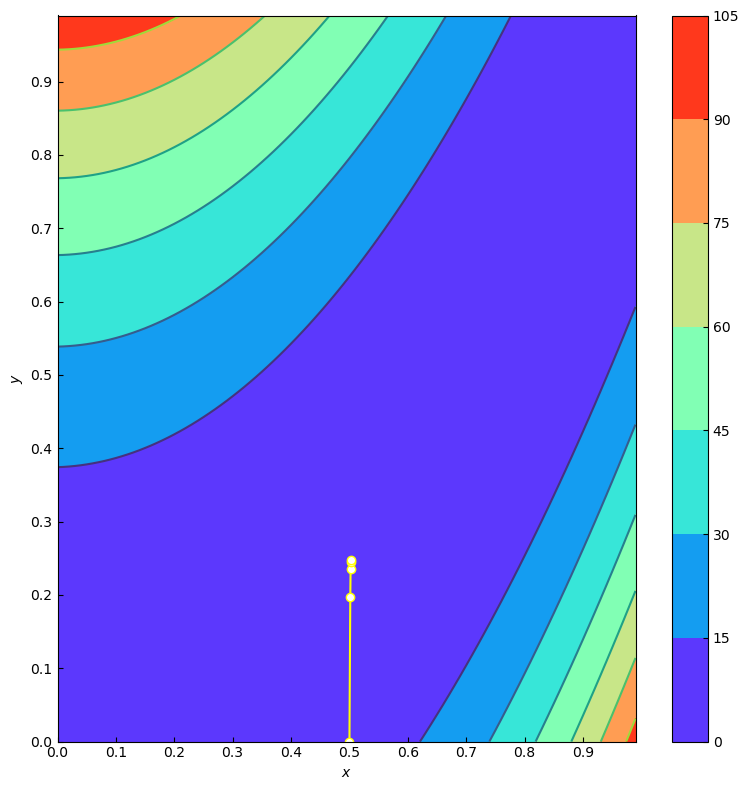

In [5]:
def f1_proxy(x,y):
    return f1(np.array([x,y]))
myplot(f1_proxy,hashcode)

another example:

$f(u,v)=sin(u+v)$

\begin{equation*}
\begin{split}
&\max_{x} \,\, f(u,v)\\
&s.t.\quad  \left\{\begin{array}{lc}
0 \leq (u+v)\leq \pi\\
u=v^3\\
\end{array}\right.
\end{split}
\end{equation*}

exact solution is u=0.68799673, v=0.88279959


In [6]:
def f2(x):
    return -jnp.sin(x[0])*jnp.cos(x[1])-jnp.sin(x[1])*jnp.cos(x[0])
def cons2(x):
    return [x[0]+x[1],-x[0]-x[1]-jnp.exp(-7*x[0])+jnp.pi,x[0]-x[1]**3,x[1]**3-x[0]]
[x,hashcode]=sqp(f2,cons2,np.array([0.5,0]),1e-2)
print(x)

iter :   1 obj:    -0.99058574 p:   -0.65558577 xk:   [0.17       1.53812143] dk_norm:   2.3835204541167316 alphak:    0.66
iter :   2 obj:    -0.99058574 p:   6.225668 xk:   [0.17       1.53812143] dk_norm:   0.541158894258969 alphak:    0.0
iter :   3 obj:    -0.99058574 p:   6.225668 xk:   [0.17       1.53812143] dk_norm:   0.541157104629637 alphak:    0.0
iter :   4 obj:    -0.99383813 p:   5.817577 xk:   [0.228382   1.45348377] dk_norm:   0.5411589136622352 alphak:    0.19
iter :   5 obj:    -0.9992984 p:   3.9756744 xk:   [0.42045285 1.18780561] dk_norm:   0.4967204150129876 alphak:    0.66
iter :   6 obj:    -0.99965626 p:   1.7432885 xk:   [0.48333318 1.11368179] dk_norm:   0.32400747713885425 alphak:    0.3
iter :   7 obj:    -0.9999603 p:   0.98295283 xk:   [0.59523024 0.9844775 ] dk_norm:   0.2589743778672547 alphak:    0.66
iter :   8 obj:    -0.99998057 p:   0.25925422 xk:   [0.6207968  0.95623765] dk_norm:   0.126979354672239 alphak:    0.3
iter :   9 obj:    -0.99999774 

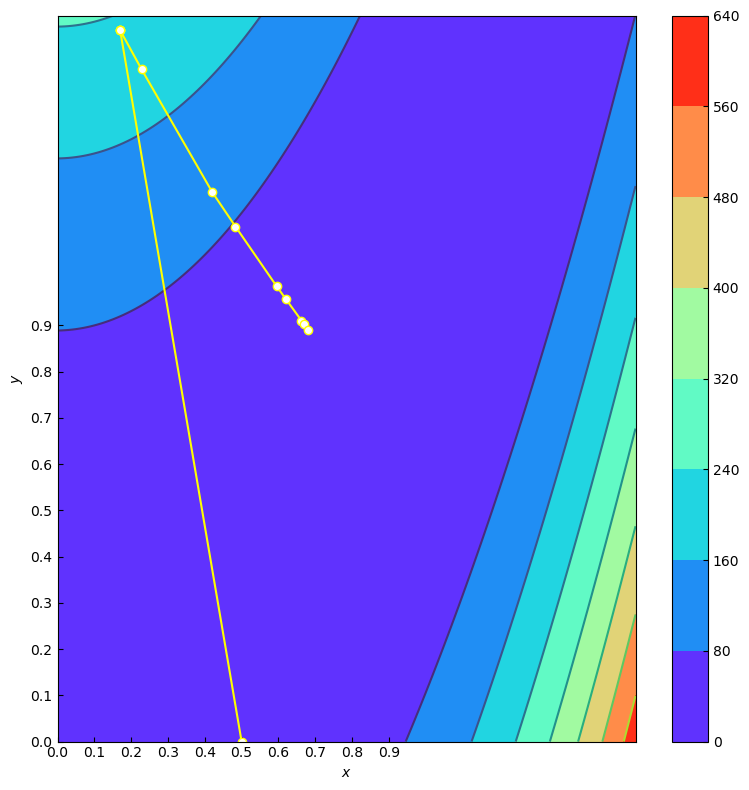

In [7]:
def f2_proxy(x,y):
    return f1(np.array([x,y]))
myplot(f2_proxy,hashcode,0,math.pi/2,0,math.pi/2)